<a href="https://colab.research.google.com/github/ktxdev/aim5004/blob/main/basic_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Regression models are powerful machine learning techniques that predict continuous outcomes based on input data. In this guide, we looked at three basic types of regression models: linear regression, polynomial regression, and Ridge regression. Each model addresses different types of interactions between variables and has distinct strengths and limitations based on the dataset and problem at hand. Making informed decisions in predictive modeling and data analysis requires an understanding of how these models function, when to utilize them, and the underlying mathematical principles.

# Linear Regression
- **How it works**
  - Linear Regression models the relationship between a dependent variable y and one or more independent variables X by fitting a straight line through the data points
  - The line is represented by the equation: $y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon$
  - Where:
    - $\beta_0$ is the intercept (constant term)
    - $\beta_1,...,\beta_n$ are the coefficients (slopes)
    - $\epsilon$ is the error term
- Used when there is a linear relationship between the dependent and independent variable, as it assumes that changes in independent variables leads to propotional changes in the dependent variable
- It minimizes the **sum squared residuals** (which  is the difference between observed and predicted values) to find the best fitting line
- **Implementation:**


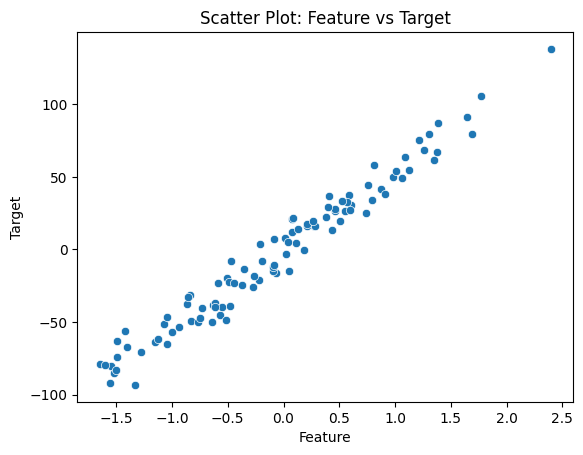

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate regression data
X, y = make_regression(n_samples=100, n_features = 1, noise = 10)


# Plot the data
sns.scatterplot(x = X[:, 0], y = y)

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Scatter Plot: Feature vs Target")
plt.show()

In [2]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create a Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")

Linear Regression MSE: 68.80


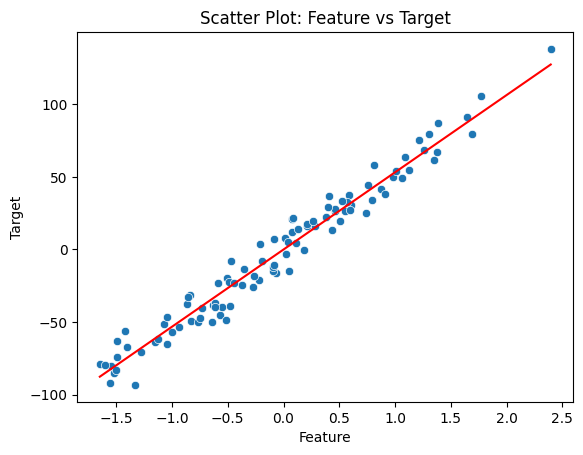

In [3]:
# Values for the regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lin_reg.predict(X_range)

# Scatter plot and regression line
sns.scatterplot(x = X[:, 0], y = y)
plt.plot(X_range, y_pred, color = 'red')

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Scatter Plot: Feature vs Target")
plt.show()

# Polynomial Regression
- It is an extension of Linear Rregression
- **How it works**
  - Models the relationship between the dependent and independent variables as an n-degree polynomial
  - The model is represented as:
  $y=\beta_0 + \beta_1X + \beta_2X^2 + ... + \beta_nX^n + \epsilon $
  - The predictors are raised to powers (degrees)
- Used when data exhibits a non-linear relationship that can be approximated by a curve
- Like Linear Regression, it minimizes the sum of squared residuals, but fits a curved line instead of a straight line
- It transforms independent variables into polynomial terms to capture mode complex relationships
- **Implementation:**

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly_features = poly_features.fit_transform(X)

# Fit a linear regression model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly_features, y)

# Predict and evaluate
y_pred = poly_reg.predict(poly_features.transform(X_test))
mse = mean_squared_error(y_test, y_pred)
print(f"Polynomial Regression MSE: {mse}")

Polynomial Regression MSE: 64.77754636062214


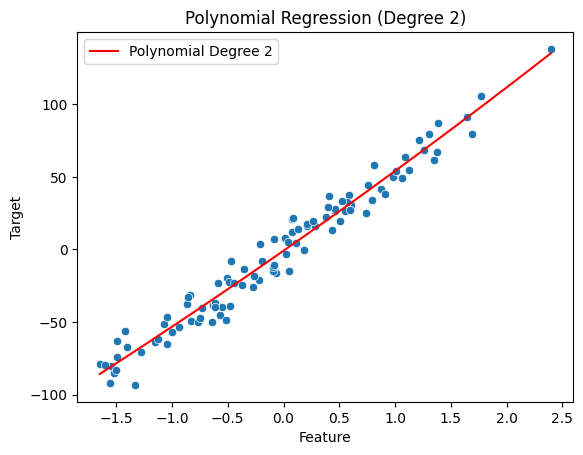

In [5]:
# Predict using the model
X_range_poly = poly_features.transform(X_range)
y_pred = poly_reg.predict(X_range_poly)

# Scatter plot and polynomial regression curve
sns.scatterplot(x = X[:, 0], y = y) # Scatter plot of the data
plt.plot(X_range, y_pred, color='red', label=f'Polynomial Degree 2')  # Regression line
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title(f"Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

# Ridge Regression
- Is a type of regularized Linear Regression
- **How it works:**
  - It introduces a penalty on the size of coefficients by adding an $L_2$-norm (sum of squares of the coefficients) to the cost function.
  - The equation:
  $\sum(y - y_{pred})^2 + \lambda\sum\beta_i^2$
  - Where $\lambda$ is a tuning parameter controlling the amount of regularization
- Used when there is multicolinearity (i.e high correlation between independent variables) or overfitting in a linear model
- Ridge shrinks coefficients to prevent overfitting, making the model more robust to noisy data
- Aims to minimize the sum of squared residuals with an additional constraint that discourages large coefficients.
This regularization reduces model complexity and improves generalization on unseen data
- **Implementation:**


In [6]:
from sklearn.linear_model import Ridge

# Create Ridge Regression model and train it
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression MSE: {mse}")

Ridge Regression MSE: 73.12355238177223


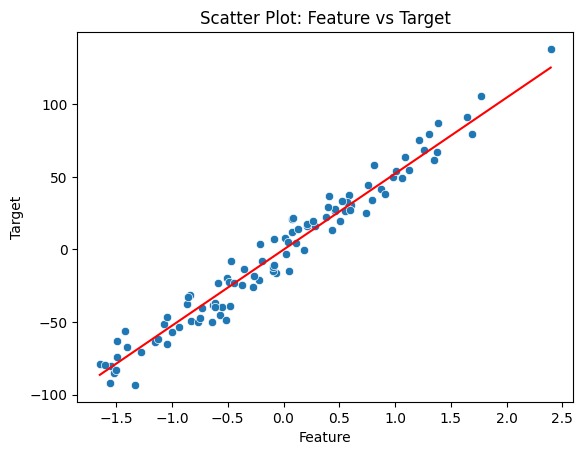

In [7]:
y_pred = ridge_reg.predict(X_range)

# Scatter plot and regression line
sns.scatterplot(x = X[:, 0], y = y)
plt.plot(X_range, y_pred, color = 'red')

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Scatter Plot: Feature vs Target")
plt.show()

# Strengths and Weaknesses of these Regression Models
| Model                | Strengths           | Weaknesses             |
|------| ---------| ----------|
| Linear Model| - Easy to implement and interpret <br> - Low compute needs, works well for large datasets <br> - Coefficients directly represent the effect of each independent variable on the dependent variable| - Falls short if relationship is non-linear <br> - Sensitive to outliers <br> - High correlation among independent variables can lead to unreliable coefficient estimates|
| Polynomial Regression | - Can handle complex relationships that a Linear model cannot <br> - Can fit curves of varied degrees, allowing it to capture more complex patterns in data <br> | - As the degree of polynomial increases, the model can overfit training data <br> - Difficult to explain and understand <br> - Requires careful tuning when deciding the right degree for the polynomial|
| Ridge Regression | - Prevents overfitting <br> - Effective with multicollinearity <br> - Produces simpler and more generalizable models | - Reduced intepretability <br> - Not suitable for all problems|